## Imports

In [ ]:
! pip install kagglehub
! pip install os

In [1]:
import sys
# --force-reinstall makes sure we don't just use the cached (broken) files
!{sys.executable} -m pip install --upgrade --force-reinstall numpy matplotlib seaborn

^C


  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached numpy-2.4.0-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached nu

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

c:\Users\zevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.style.use('ggplot')
os.environ['KAGGLE_USERNAME'] = "Shakede"
os.environ['KAGGLE_KEY'] = "KGAT_b25e42fcf4cc60ea92c3e9779f0230e1"

In [20]:
def load_and_prep_data():
    """
    Downloads data from Kaggle, cleans it, and performs initial feature engineering.
    Returns: Cleaned DataFrame
    """
    print("--- 1. Data Ingestion ---")

    path = kagglehub.dataset_download("prasad22/healthcare-dataset")
    csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
    full_path = os.path.join(path, csv_file)
    
    print(f"Loading data from: {full_path}")
    df = pd.read_csv(full_path)
    
    # --- Data Quality Check ---
    print("\n--- 2. Data Quality Check ---")
    missing_summary = df.isnull().sum()
    
    # Filter to show only columns with missing values (if any)
    missing_cols = missing_summary[missing_summary > 0]
    
    if missing_cols.empty:
        print("Great news! No missing values detected in the dataset.")
    else:
        print("Missing values detected:")
        print(missing_cols)
        
    print(df.columns) 

    return df

--- 1. Data Ingestion ---
Loading data from: C:\Users\zevel\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2\healthcare_dataset.csv

--- 2. Data Quality Check ---
Great news! No missing values detected in the dataset.


In [21]:
def Feature_Engineering(df):
    df.columns = df.columns.str.replace(" ", "_")
    df["Length_Of_Stay"] = (pd.to_datetime(df["Discharge_Date"]) - pd.to_datetime(df["Date_of_Admission"])).dt.days
    df["Length_Of_Stay"] = df["Length_Of_Stay"].abs()
    df["Risk_Score"] = df["Age"] / 10 + np.random.randint(0,10,size = len(df)) #this will be changed later when I build the LM
    print("\n--- 3. Feature Engineering Completed ---")
    return df

In [27]:
def Stat_Plots(df):
    # Distribution of Length of Stay by Medical Condition
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='Medical_Condition', y='Length_Of_Stay', palette='muted')
    plt.title('Distribution of Length of Stay by Medical Condition')
    plt.xticks(rotation=45) # Rotate labels so they don't overlap
    plt.show()
    
    # Correlation between Risk Score and Billing Amount
    sns.lmplot(data=df, x='Risk_Score', y='Billing_Amount', height=6, aspect=1.5, line_kws={'color': 'red'})
    plt.title('Correlation: Risk Score vs. Billing Amount')
    plt.show()
    
    # Boxplot of Billing Amount by Insurance Provider and Gender
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, 
            x='Insurance_Provider', 
            y='Billing_Amount', 
            hue='Gender',     
            palette='Set2')
    plt.title('Billing Amount Distribution by Insurance Provider & Gender')
    plt.show()
    
    # Scatter plot with continuous color mapping for Age
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, 
                x='Risk_Score', 
                y='Billing_Amount', 
                hue='Age',        
                palette='viridis', 
                alpha=0.6)       
    plt.title('Risk vs. Billing (Colored by Age)')
    plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
    plt.show()
    
    # Faceted boxplots of Billing Amount by Insurance Provider
    plt.figure(figsize=(12, 6))
    sns.catplot(data=df, 
            x='Insurance_Provider', 
            y='Billing_Amount', 
            hue='Gender', 
            col='Medical_Condition', # <--- This is your 'facet_wrap'
            kind='box',              
            col_wrap=3,              # Start a new row after 3 graphs
            height=4, aspect=1.2)    # Adjust size of each small graph

    plt.show()
    

In [ ]:
Healthcare_Dataset = load_and_prep_data()
Healthcare_Dataset = Feature_Engineering(Healthcare_Dataset)


C:\Users\zevel\AppData\Local\Temp\ipykernel_6648\2376109619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Medical_Condition', y='Length_Of_Stay', palette='muted')


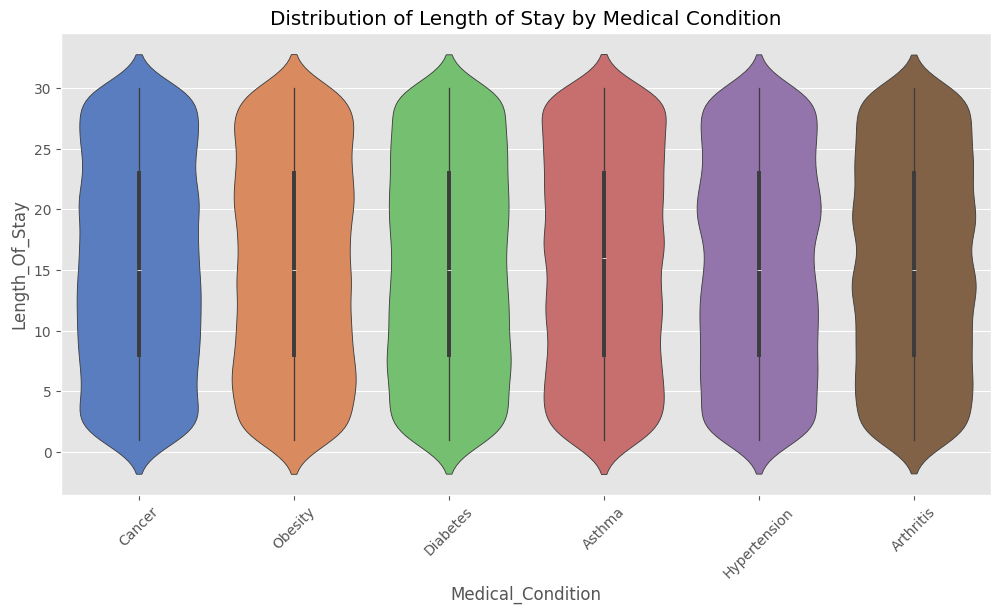

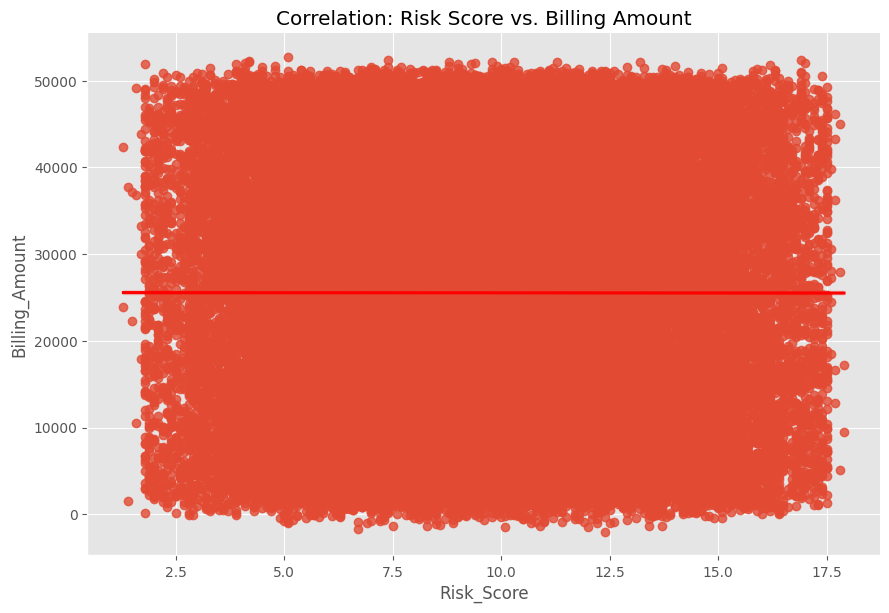

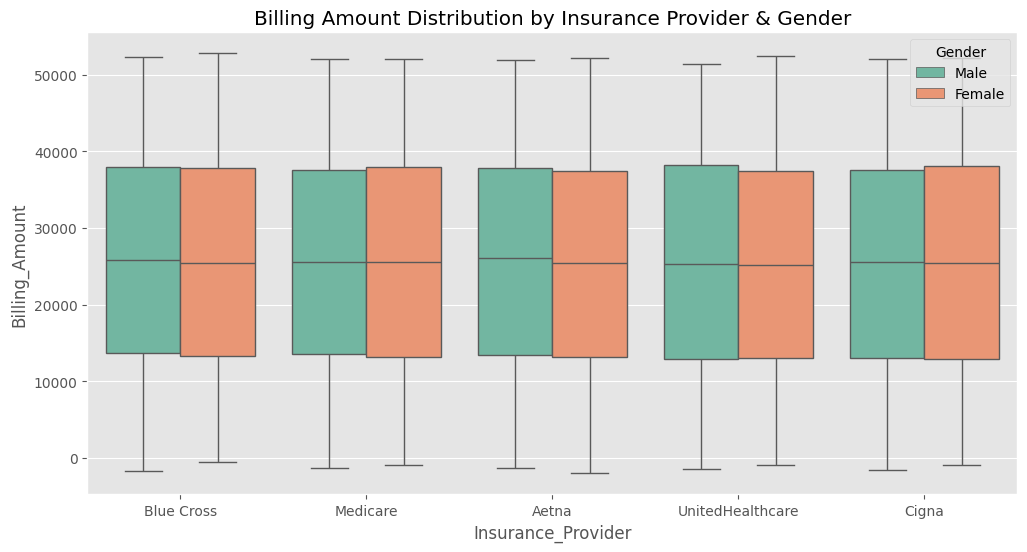

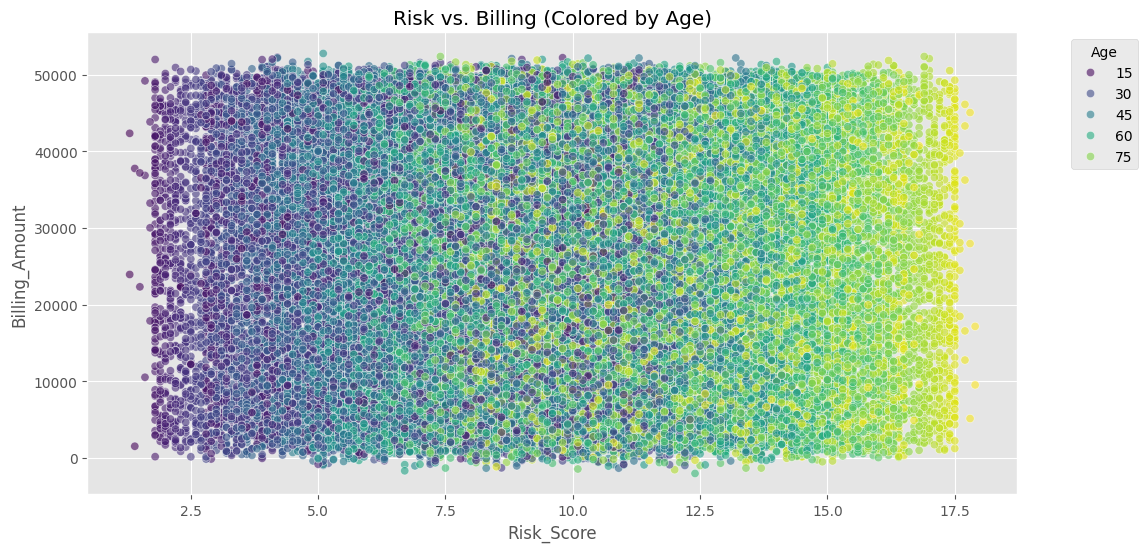

<Figure size 1200x600 with 0 Axes>

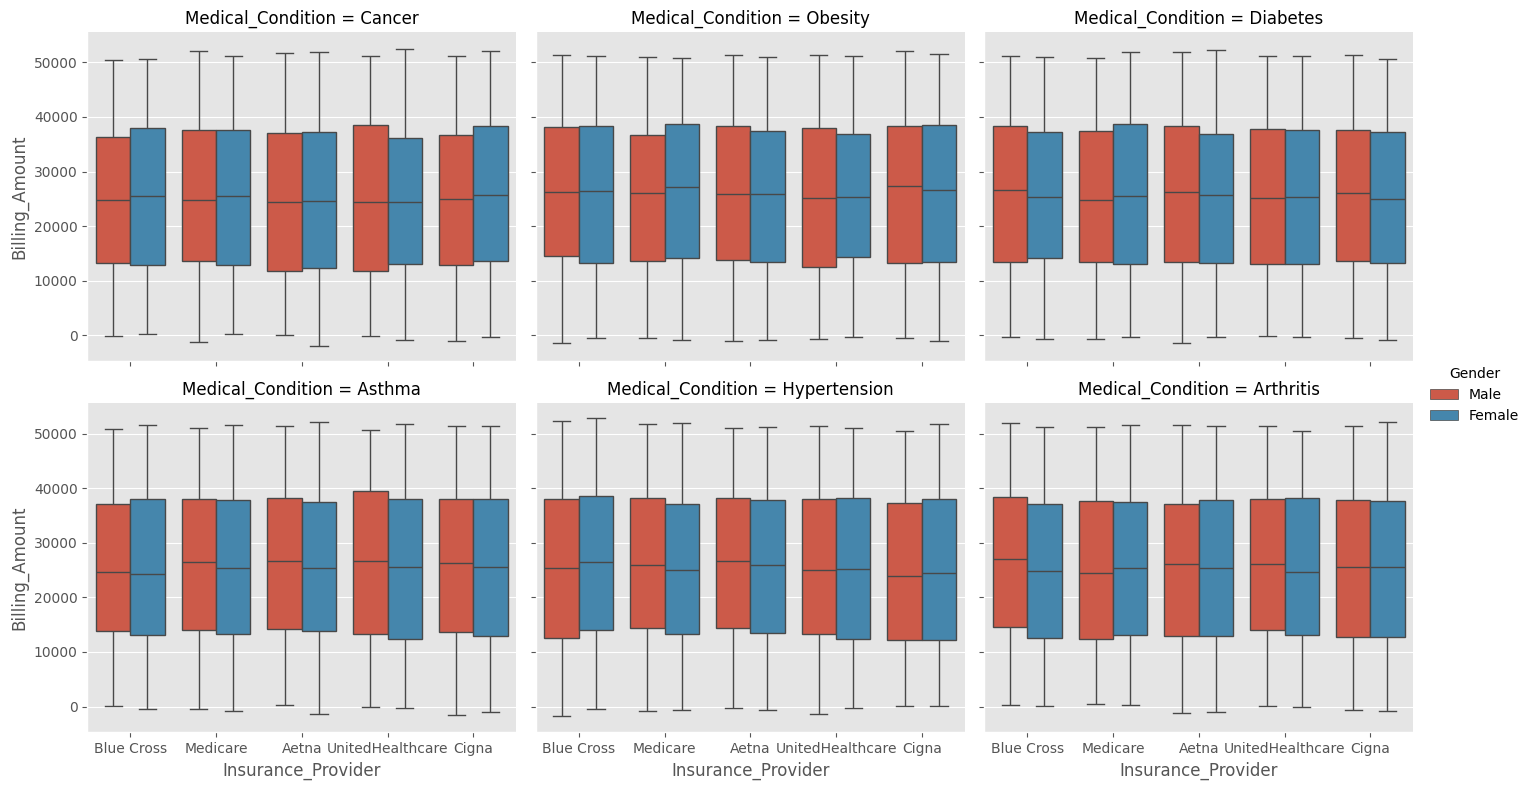

In [28]:
Stat_Plots(Healthcare_Dataset)